In [55]:
import pandas as pd
import numpy as np
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns


# Adatkezelés

Az adatok kezelésének legalapvetőbb nyelve az SQL, ismerkedjünk meg gyorsana használatával. Amit mindenképpen ismerni kell  az a SELECT WHERE, CASE IF, JOIN és a GROUPBY.

In [56]:
filename = "Datafiniti_Mens_Shoe_Prices.csv"
def read_shoe_data(filename):
    #csak bizonyos oszlopok érdekelnek
    sp_data = pd.read_csv(filename,delimiter=',',usecols = ["id", "brand", "categories", "colors","dateAdded",
                                                           "manufacturer","name","prices.amountMin",
                                                            "prices.amountMax","prices.condition","prices.currency",
                                                            "prices.isSale","prices.merchant",
                                                            "prices.offer","prices.shipping"])
    rename_dict = {key: key.replace(".","_") for key in sp_data.columns}
    sp_data.rename(rename_dict,axis = 1,inplace=True)
    #alternatívaként át lehet írni a column objektumot is
    sp_data.columns = [col.replace(".","_") for col in sp_data.columns]
    return sp_data
sp_data = read_shoe_data(filename)
sp_data.head()

,id,brand,categories,colors,dateAdded,manufacturer,name,prices_amountMin,prices_amountMax,prices_condition,prices_currency,prices_isSale,prices_merchant,prices_offer,prices_shipping
0,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,NaN,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,USD,true,NaN,REDUCED USD 12.10,NaN
1,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,NaN,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,new,USD,false,UnbeatableSale - Walmart.com,REDUCED USD 12.10,NaN
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,new,USD,false,SIM Supply Inc - Walmart.com,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,new,USD,false,SIM Supply Inc - Walmart.com,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,46.26,46.26,new,USD,false,SIM Supply Inc - Walmart.com,NaN,NaN


## Select

In [57]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
# Select Statement
sql_result = pysqldf("SELECT id,brand FROM sp_data LIMIT 10;")
all(sql_result == sp_data[["id","brand"]].head(10))


True

In [58]:
sql_result

,id,brand
0,AVpfHrJ6ilAPnD_xVXOI,Josmo
1,AVpfHrJ6ilAPnD_xVXOI,Josmo
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL
5,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL
6,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL
7,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL
8,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL
9,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL


## Where

In [59]:
# Where
sql_result = pysqldf("SELECT id,brand, name FROM sp_data WHERE brand='Josmo';")
condition = sp_data["brand"]=="Josmo"
all(sql_result == sp_data.loc[condition,["id","brand","name"]].reset_index(drop=True))

True

## Case When

In [60]:
sp_data["prices_offer"].value_counts().head(10)

winning bid            1261
REDUCED                 510
REDUCED USD 30.01        55
REDUCED USD 15.01        54
CLEARANCE USD 30.01      47
REDUCED USD 40.01        46
REDUCED USD 13.01        44
REDUCED USD 35.01        40
REDUCED USD 12.01        37
REDUCED USD 20.01        36
Name: prices_offer, dtype: int64

In [61]:
sql_result = pysqldf("""SELECT id,brand, name,
    CASE WHEN prices_offer LIKE '%REDUCED%' THEN 'REDUCED'
        WHEN prices_offer LIKE '%CLEARANCE%' THEN 'CLEARANCE'
        WHEN prices_offer LIKE '%WINNING%' THEN 'WINNING_BID'
        ELSE 'OTHER_OFFER'
        END as Offer_Category
    FROM sp_data;""")
sql_result["Offer_Category"].value_counts()

OTHER_OFFER    13865
REDUCED         3387
WINNING_BID     1261
CLEARANCE        874
Name: Offer_Category, dtype: int64

In [62]:
# Lássuk mi történik ha ezt kihagyjuk
#sp_data["prices_offer"].fillna("UNKNOWN",inplace=True)

In [63]:
sp_data["Offer_Category"] = np.where(sp_data["prices_offer"].str.contains("REDUCED"),"REDUCED",
                                    np.where(sp_data["prices_offer"].str.contains("winning bid"),"WINNING_BID",
                                            np.where(sp_data["prices_offer"].str.contains("CLEARANCE"),"CLEARANCE","OTHER_OFFER")))

sp_data["Offer_Category"].value_counts()

REDUCED        16683
WINNING_BID     1261
CLEARANCE        874
OTHER_OFFER      569
Name: Offer_Category, dtype: int64

In [64]:
sp_data.loc[sp_data["Offer_Category"]=="REDUCED","prices_offer"]

0        REDUCED USD 12.10
1        REDUCED USD 12.10
2                      NaN
3                      NaN
4                      NaN
               ...        
19382                  NaN
19383                  NaN
19384                  NaN
19385                  NaN
19386                  NaN
Name: prices_offer, Length: 16683, dtype: object

In [65]:
sp_data["prices_offer"].str.contains("REDUCED")

0        True
1        True
2         NaN
3         NaN
4         NaN
         ... 
19382     NaN
19383     NaN
19384     NaN
19385     NaN
19386     NaN
Name: prices_offer, Length: 19387, dtype: object

In [66]:
np.where(sp_data["prices_offer"].str.contains("REDUCED"),"REDUCED","LOL")

array(['REDUCED', 'REDUCED', 'REDUCED', ..., 'REDUCED', 'REDUCED',
       'REDUCED'], dtype='<U7')

## Groupby

Itt kezdődik kicsit bonyolúdni a történet, ki tudná megmondani hogy mit csinál a group by?

In [67]:
# Próbáljuk meg kiszámolni hogy mennyi a cipők átlagára márkánként
from pandas.core.groupby.groupby import DataError
try:
    prices_by_brand = sp_data.groupby("brand").agg({
        "prices_amountMin":"mean",
        "id":"count"
    })
except DataError:
    print("DATAERROR")
# ez nem működik!!!!

DATAERROR


In [68]:
sp_data.dtypes

id                  object
brand               object
categories          object
colors              object
dateAdded           object
manufacturer        object
name                object
prices_amountMin    object
prices_amountMax    object
prices_condition    object
prices_currency     object
prices_isSale       object
prices_merchant     object
prices_offer        object
prices_shipping     object
Offer_Category      object
dtype: object

In [69]:
def convert_to_numeric(collist,sp_data):
    for col in collist:
        sp_data[col] = pd.to_numeric(sp_data[col],errors = "coerce")
    return sp_data
collist = ["prices_amountMin","prices_amountMax"]
sp_data = convert_to_numeric(collist,sp_data)


In [70]:
sp_data["prices_amountMax"]

0        39.89
1        51.99
2        40.02
3        50.31
4        46.26
         ...  
19382    29.95
19383    64.95
19384    32.48
19385    31.48
19386    72.00
Name: prices_amountMax, Length: 19387, dtype: float64

In [71]:
prices_by_brand = sp_data.groupby("brand").agg({
    "prices_amountMin":"mean",
    "prices_amountMax":"mean",
    "id":"count"
})
price_by_brand_sql = pysqldf("""SELECT brand, count(id), sum(prices_amountMin), sum(prices_amountMax)
    FROM sp_data
    GROUP BY brand;""")
price_by_brand_sql


,brand,count(id),sum(prices_amountMin),sum(prices_amountMax)
0,None,258,23705.85,28492.79
1,1031,1,44.51,44.51
2,12 Step Gold,2,99.95,99.95
3,14k co.,36,6171.91,6171.91
4,180s,4,101.76,101.76
...,...,...,...,...
1956,unbranded,6,174.86,174.86
1957,under armour,2,334.98,334.98
1958,willtopinc,4,57.96,57.96
1959,wings + horns,1,380.00,380.00


In [72]:
# nem jó így a brand! le kell jól fordítani hogy értse a gép h mik ugyanazok
prices_by_brand

,prices_amountMin,prices_amountMax,id
brand,,,
1031,44.510000,44.510000,1
12 Step Gold,49.975000,49.975000,2
14k co.,171.441944,171.441944,36
180s,25.440000,25.440000,4
1883 by Wolverine,149.950000,149.950000,1
...,...,...,...
unbranded,29.143333,29.143333,6
under armour,167.490000,167.490000,2
willtopinc,14.490000,14.490000,4


In [73]:
sp_data["brand_clean"] = sp_data["brand"].str.lower()
sp_data["brand_clean"] = sp_data["brand_clean"].str.replace(" ","_")
sp_data["brand_clean"] = sp_data["brand_clean"].astype("category")
len(sp_data["brand_clean"].unique())

1823

In [74]:
len(sp_data["brand"].unique())

1961

<AxesSubplot:>

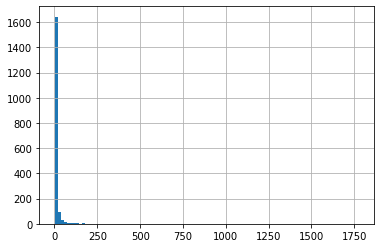

In [75]:
prices_by_brand = sp_data.groupby("brand_clean").agg({
    "prices_amountMin":"mean",
    "prices_amountMax":"mean",
    "id":"count"
})
prices_by_brand["id"].hist(bins=100)

In [76]:
# oké, tehát nagyon sok kis brand van, amiről nem érdemes brand szintű átlagot mondani, mert csak 1 van
# ilyenkor jobb ha ezt az adatban is jelezzük, így nem jutunk félrevezető következtetésekre
# mit javasoltok, hogy kezeljük ezt?
# cél 1: Adatvizualizációkat akarok gyártani
# cél 2: modellben akarom hosználni a brand átlagárat mint változót

In [77]:
prices_by_brand["BIG_BRAND"] = prices_by_brand["id"] > 5
prices_by_brand["BIG_BRAND"].value_counts()

False    1278
True      544
Name: BIG_BRAND, dtype: int64

In [78]:
sp_data_sql_join = pysqldf("""SELECT * FROM
                           sp_data LEFT JOIN price_by_brand_sql ON sp_data.brand==price_by_brand_sql.brand""")
sp_data_sql_join

,id,brand,categories,colors,dateAdded,manufacturer,name,prices_amountMin,prices_amountMax,prices_condition,...,prices_isSale,prices_merchant,prices_offer,prices_shipping,Offer_Category,brand_clean,brand,count(id),sum(prices_amountMin),sum(prices_amountMax)
0,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",None,2016-11-07T00:45:12Z,None,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,None,...,true,None,REDUCED USD 12.10,None,REDUCED,josmo,Josmo,20.0,918.80,918.80
1,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",None,2016-11-07T00:45:12Z,None,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,new,...,false,UnbeatableSale - Walmart.com,REDUCED USD 12.10,None,REDUCED,josmo,Josmo,20.0,918.80,918.80
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",None,2016-06-14T04:29:57Z,None,Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,new,...,false,SIM Supply Inc - Walmart.com,None,None,REDUCED,servus_by_honeywell,SERVUS BY HONEYWELL,20.0,1125.26,1125.26
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",None,2016-06-14T04:29:57Z,None,Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,new,...,false,SIM Supply Inc - Walmart.com,None,None,REDUCED,servus_by_honeywell,SERVUS BY HONEYWELL,20.0,1125.26,1125.26
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",None,2016-06-14T04:29:57Z,None,Servus By Honeywell Shoe Studs Zsr101blmlg,46.26,46.26,new,...,false,SIM Supply Inc - Walmart.com,None,None,REDUCED,servus_by_honeywell,SERVUS BY HONEYWELL,20.0,1125.26,1125.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19382,AVpfdSjlilAPnD_xcGPm,"Xray, XRay","Clothing, Shoes & Accessories,Men's Shoes,Boots",Black,2016-03-04T05:54:20Z,None,New Xray Hester Men's Lace Up Boots - Black - ...,29.95,29.95,New with box,...,false,None,None,USD 7.95,REDUCED,"xray,_xray","Xray, XRay",1.0,29.95,29.95
19383,AVpf3bFWilAPnD_xjrQ2,Fila,"Clothing,Shoes,Men's Shoes,All Men's Shoes",None,2016-10-05T22:23:17Z,unknown,Fila Men's Original Tennis Navy/white/gold Fas...,64.95,64.95,new,...,false,ULTIMATE SHOE ZONE - Walmart.com,None,None,REDUCED,fila,Fila,53.0,2459.39,2459.39
19384,AVpf0fJXLJeJML43EVe9,Seek Optics,"Women's Sunglasses,Sunglasses,Bags & Accessori...",None,2016-01-02T02:39:11Z,None,Seek Optics New Seek Polarized Replacement Len...,32.48,32.48,None,...,true,"Seek Optics, Inc",None,None,REDUCED,seek_optics,Seek Optics,42.0,1263.08,1263.08
19385,AVpf0fJXLJeJML43EVe9,Seek Optics,"Women's Sunglasses,Sunglasses,Bags & Accessori...",None,2016-01-02T02:39:11Z,None,Seek Optics New Seek Polarized Replacement Len...,31.48,31.48,None,...,true,"Seek Optics, Inc",None,None,REDUCED,seek_optics,Seek Optics,42.0,1263.08,1263.08


In [79]:
sp_data_2 = sp_data.merge(prices_by_brand,how="left",left_on="brand_clean",right_index=True)
sp_data_2["BIG_BRAND"].value_counts()
# ezzel akkor a join is megvan
#join típusok: left right inner outer, anti join stb

True     16423
False     2706
Name: BIG_BRAND, dtype: int64

## Dátum


In [80]:
sp_data["dateAdded"]

0        2016-11-07T00:45:12Z
1        2016-11-07T00:45:12Z
2        2016-06-14T04:29:57Z
3        2016-06-14T04:29:57Z
4        2016-06-14T04:29:57Z
                 ...         
19382    2016-03-04T05:54:20Z
19383    2016-10-05T22:23:17Z
19384    2016-01-02T02:39:11Z
19385    2016-01-02T02:39:11Z
19386    2016-01-02T02:39:11Z
Name: dateAdded, Length: 19387, dtype: object

In [81]:
sp_data["dateAdded_as_date"] = pd.to_datetime(sp_data["dateAdded"])
sp_data["dateAdded_as_date"].dt.year.value_counts()
# és akkor még időzónákról nem is beszéltem ...

2016    11963
2017     4297
2015     2991
2014      136
Name: dateAdded_as_date, dtype: int64

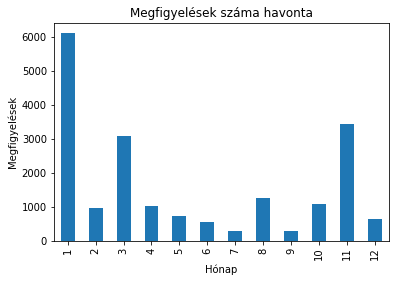

In [82]:
def plot_offers_by_date(sp_data):
    fig, axes = plt.subplots(1,1)
    
    sp_data["dateAdded_as_date"].dt.month.value_counts().sort_index().plot(kind="bar",ax = axes)
    axes.set_xlabel("Hónap")
    axes.set_ylabel("Megfigyelések")
    axes.set_title("Megfigyelések száma havonta")
plot_offers_by_date(sp_data)

In [83]:
sp_data["colors"].value_counts()

Black                                                                                  1512
Brown                                                                                   783
Blue                                                                                    430
Multicolor                                                                              423
White                                                                                   258
                                                                                       ... 
Black,Chestnut,Gray,Grey                                                                  1
Realtree Xtra,Black                                                                       1
BlueGrey,DkshdwgyPwrgrn,ZINC GREYTNF BLACK,Honor BlueValencia Orange,GreyDayglo Yel       1
COOL GREYMETALLIC HEMATITE-BLACK                                                          1
Dkbrown                                                                         

In [84]:
sp_data["categories"].value_counts()

All Men's Shoes,Shoes,Men's Shoes,Clothing                                                                                                 3717
Clothing,Shoes,Men's Shoes,All Men's Shoes                                                                                                 1644
Men's Casual Shoes,Shoes,Men's Shoes,Clothing                                                                                               699
All Men's Clothing,Men's Clothing,Men's Outerwear,Clothing, Shoes & Jewelry,Clothing                                                        588
Clothing, Shoes & Accessories,Men's Shoes,Athletic                                                                                          400
                                                                                                                                           ... 
Sports,Clothing, Shoes & Jewelry,Novelty & More,Clothing,Novelty,Men,Hoodies                                                            

In [85]:
# van olyan oszlop, ahol több szín is van
# erre a Countert fogjuk használni
# nem minden kategorikus változó hasznos! 
from tqdm import tqdm
tqdm.pandas()
from collections import Counter
def create_count_of_list_column(data,columns_name):
    data[columns_name] = data[columns_name].fillna(f"UNKNOWN_{columns_name}")
    data[columns_name] = data[columns_name].str.replace("-","").str.replace(", ",",").str.lower()
    # csinálok belőle egy listát
    data[f"{columns_name}_list"] = data[columns_name].progress_apply(lambda x: str(x).split(",") if str(x)!=f"UNKNOWN_{columns_name}" else [])
    #ez ugye oszlopként listák listája
    flattened_list = [item for sublist in data[f"{columns_name}_list"].to_list() for item in sublist]
    # és csinálok belőle egy olyat, hogy melyik szín / kategória hányszor szerepel
    return pd.Series(Counter(flattened_list)).sort_values(ascending=False)
categories = create_count_of_list_column(sp_data,"categories")
colors = create_count_of_list_column(sp_data,"colors")
print("CATEGORIES")
print(categories)
print("COLORS")
print(colors)
def filter_for_mens_shoes(sp_data):
    # csak azok kellenek, amik nagyok
    # amint látjuk, ezek átfednek egymással nagyon sok mindenben, ebből leginkább szűkíteni kellene
    cond_1 = sp_data["categories"].str.contains("men's shoes")
    cond_2 = ~sp_data["categories"].str.contains("women")
    joint_cond = cond_1&cond_2
    sp_data_selected = sp_data[joint_cond].copy(deep=True)
    print(f"Selected {sp_data_selected.shape[0]} from {sp_data.shape[0]}")
    categories = create_count_of_list_column(sp_data_selected,"categories")
    return sp_data_selected
sp_data_selected = filter_for_mens_shoes(sp_data)

100%|██████████| 9603/9603 [00:00<00:00, 252353.57it/s]

CATEGORIES
clothing                                                      21008
shoes                                                         10746
men's shoes                                                    9713
all men's shoes                                                6219
shoes & jewelry                                                5590
                                                              ...  
coats                                                             1
wrestling                                                         1
see more nike hypervenomx finale ic indoor soccer shoe ...        1
lightweight/minimal                                               1
see more men's levi's 505 straight leg regular fit jean...        1
Length: 979, dtype: int64
COLORS
unknown_colors                   8339
black                            2792
brown                            1186
multicolor                        669
blue                              639
                  

In [86]:
# bónusz:
np.nan==np.nan

False

# Alapfogások

Hiányzó értékek, Skálázás, One Hot Encoding, Outllierek, Logging

In [87]:
sp_data_selected.count()

id                   9603
brand                9552
categories           9603
colors               9603
dateAdded            9603
manufacturer         5581
name                 9603
prices_amountMin     9555
prices_amountMax     9593
prices_condition     7990
prices_currency      9562
prices_isSale        9563
prices_merchant      7380
prices_offer         4613
prices_shipping       951
Offer_Category       9603
brand_clean          9552
dateAdded_as_date    9603
categories_list      9603
colors_list          9603
dtype: int64

In [88]:
# Hogy kezelnétek a hiányzó értékeket az egyes oszlopokban?
#Átlag, Medián, Módusz, Drop, nulla?
sp_data_selected["prices_shipping"].fillna(0,inplace=True)
print(sp_data_selected.shape)
sp_data_selected.dropna(subset=["prices_amountMin","prices_amountMax","colors","brand"],inplace=True)
print(sp_data_selected.shape)
sp_data_selected["prices_condition"].value_counts()

(9603, 20)
(9504, 20)


new                 6886
New with box         667
New without box      146
New                  104
Pre-owned             98
New with defects      28
Brand New              6
New with tags          1
Name: prices_condition, dtype: int64

In [89]:
# stringeket mindig érdemes lowerre tenni, hacsak nem szuperfontos a nagybetű
sp_data_selected["prices_condition_clean"] = sp_data_selected["prices_condition"].str.lower()
# a leggyakoribb értékkel imputálunk
# ez se biztos jó, ha fontosnak tűnik akkor érdemes megpróbálni többféle megközelítést
sp_data_selected["prices_condition_clean"].fillna(sp_data_selected["prices_condition_clean"].mode()[0],
                                                  inplace=True)
sp_data_selected["prices_condition_clean"].value_counts()


new                 8558
new with box         667
new without box      146
pre-owned             98
new with defects      28
brand new              6
new with tags          1
Name: prices_condition_clean, dtype: int64

## Outlierek

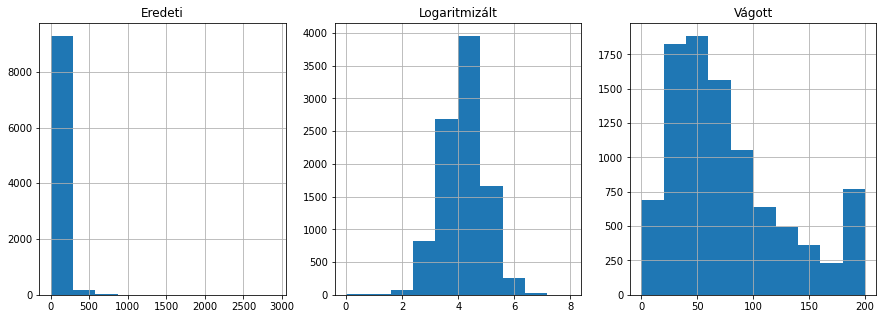

In [90]:
def handle_prices(sp_data_selected):
    for col in ["prices_amountMax","prices_amountMin"]:
        sp_data_selected["log_"+col] = np.log(sp_data_selected[col]+1)
        #másik opció: clipping
        sp_data_selected["clipped_"+col] = sp_data_selected[col].clip(lower=0,upper = 200)
    fig, axes = plt.subplots(1,3, figsize = (15,5))
    sp_data_selected["prices_amountMax"].hist(ax = axes[0])  
    axes[0].set_title("Eredeti")
    sp_data_selected["log_prices_amountMax"].hist(ax = axes[1])
    axes[1].set_title("Logaritmizált")
    sp_data_selected["clipped_prices_amountMax"].hist(ax = axes[2])
    axes[2].set_title("Vágott")
    return sp_data_selected
sp_data_selected = handle_prices(sp_data_selected)

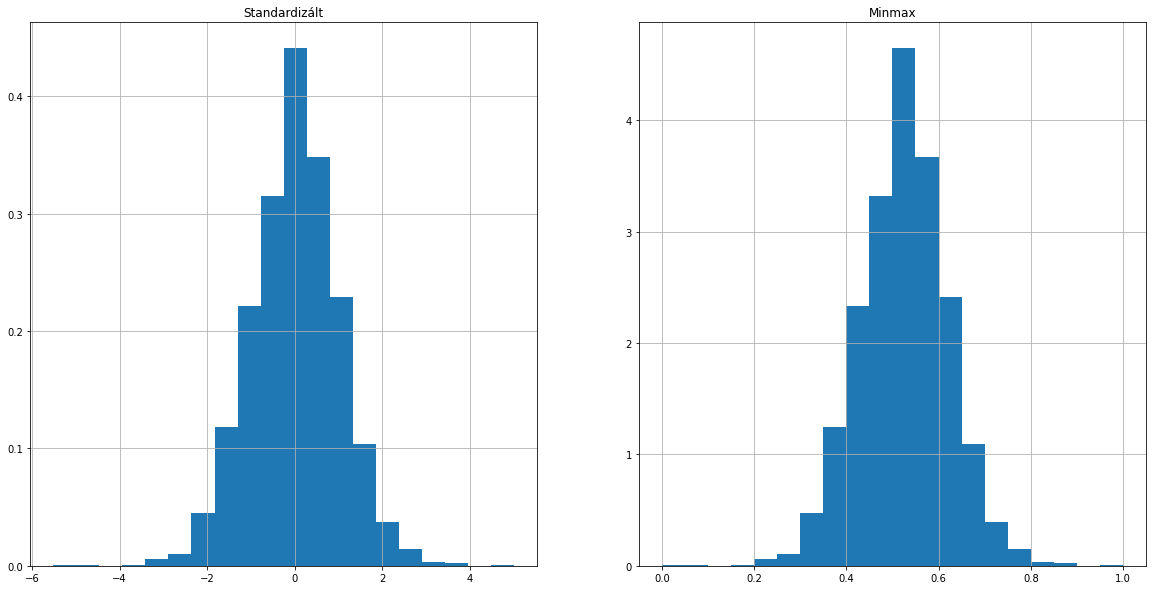

In [91]:
# Skálázás
from sklearn.preprocessing import StandardScaler, MinMaxScaler
def scale_prices(sp_data_selected):
    standard_scaler = StandardScaler()
    minmax_scaler = MinMaxScaler()

    sp_data_selected["log_standardized_prices_amountMax"] = standard_scaler.fit_transform(sp_data_selected[["log_prices_amountMax"]])
    sp_data_selected["log_standardized_minmaxed_prices_amountMax"] = minmax_scaler.fit_transform(sp_data_selected[["log_standardized_prices_amountMax"]])
    fig, axes = plt.subplots(1,2,figsize=(20,10))
    
    sp_data_selected["log_standardized_prices_amountMax"].hist(bins = 20,ax = axes[0],density = True)
    axes[0].set_title("Standardizált")

    sp_data_selected["log_standardized_minmaxed_prices_amountMax"].hist(bins = 20,ax = axes[1],density = True)
    axes[1].set_title("Minmax")
scale_prices(sp_data_selected)
# na akkor mi a tök történik itt?
# standardizálásnak mi köze van a z-scorehoz?

# One hot Encoding

In [92]:
def add_brand_clean_to_sp_data(sp_data_selected):
    vc = sp_data_selected["brand_clean"].value_counts()
    vc.name="brand_freq"
    sp_data_selected = sp_data_selected.merge(vc.to_frame(),how="left",
                                             left_on = "brand_clean",right_index=True)
    
    sp_data_selected["brand_clean_selected"] = np.where(sp_data_selected["brand_freq"]>100,
                                                        sp_data_selected["brand_clean"],"OTHER_BRAND")

    return sp_data_selected
sp_data_selected = add_brand_clean_to_sp_data(sp_data_selected)


In [93]:
sp_data_selected["brand_clean_selected"] = np.where(sp_data_selected["brand_freq"]>100,
                                                    sp_data_selected["brand_clean"],"OTHER_BRAND")


In [94]:
sp_data_selected.columns

Index(['id', 'brand', 'categories', 'colors', 'dateAdded', 'manufacturer',
       'name', 'prices_amountMin', 'prices_amountMax', 'prices_condition',
       'prices_currency', 'prices_isSale', 'prices_merchant', 'prices_offer',
       'prices_shipping', 'Offer_Category', 'brand_clean', 'dateAdded_as_date',
       'categories_list', 'colors_list', 'prices_condition_clean',
       'log_prices_amountMax', 'clipped_prices_amountMax',
       'log_prices_amountMin', 'clipped_prices_amountMin',
       'log_standardized_prices_amountMax',
       'log_standardized_minmaxed_prices_amountMax', 'brand_freq',
       'brand_clean_selected'],
      dtype='object')

In [95]:

sp_data_selected["brand_clean_selected"].value_counts(normalize=True)

OTHER_BRAND      0.633944
nike             0.110480
puma             0.061027
new_balance      0.037247
vans             0.036195
reebok           0.026515
jordan           0.017887
converse         0.015783
skechers         0.015362
asics            0.012100
crocs            0.011785
toms             0.010838
gameday_boots    0.010838
Name: brand_clean_selected, dtype: float64

In [96]:
from sklearn.preprocessing import OneHotEncoder
def convert_brand_to_dummies(sp_data_selected):
    enc = OneHotEncoder(handle_unknown='ignore')
    ohe = enc.fit_transform(sp_data_selected[["brand_clean_selected"]]).toarray()
    # ekvivalens a pd.get_dummies()
    sp_data_selected = pd.concat([sp_data_selected,pd.DataFrame(ohe,columns = enc.categories_)],axis = 1)
    return sp_data_selected
sp_data_selected = convert_brand_to_dummies(sp_data_selected)
sp_data_selected.head()

,id,brand,categories,colors,dateAdded,manufacturer,name,prices_amountMin,prices_amountMax,prices_condition,...,"(crocs,)","(gameday_boots,)","(jordan,)","(new_balance,)","(nike,)","(puma,)","(reebok,)","(skechers,)","(toms,)","(vans,)"
0,AVpfHrJ6ilAPnD_xVXOI,Josmo,"clothing,shoes,men's shoes,all men's shoes",unknown_colors,2016-11-07T00:45:12Z,NaN,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",39.89,39.89,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AVpfHrJ6ilAPnD_xVXOI,Josmo,"clothing,shoes,men's shoes,all men's shoes",unknown_colors,2016-11-07T00:45:12Z,NaN,"Josmo 8190 Plain Infant Walking Shoes, Navy - ...",51.99,51.99,new,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"all men's shoes,shoes,men's shoes,clothing",unknown_colors,2016-06-14T04:29:57Z,NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,40.02,40.02,new,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"all men's shoes,shoes,men's shoes,clothing",unknown_colors,2016-06-14T04:29:57Z,NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,50.31,50.31,new,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"all men's shoes,shoes,men's shoes,clothing",unknown_colors,2016-06-14T04:29:57Z,NaN,Servus By Honeywell Shoe Studs Zsr101blmlg,46.26,46.26,new,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Dimenzionalitás redukció

Itt az történik hogy redukáljuk az oszlopok számát, miközben megtartjuk az információt. 

A PCA-t és a faktoranalízist fogom bemutatni, a többinél elég ha az ötletet értitek, az általunk tanult use casekben nem fognak kelleni, azért akit érdekel (v ilyesmiből írja a beszámolóját), az játszhat vele.

In [97]:
# Mit is kell csinálni PCA előtt?
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
numerical_columns = ["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]
penguins.head()


,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [98]:
penguins = penguins.dropna()
penguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

In [99]:
penguins.count()

species_short        334
island               334
culmen_length_mm     334
culmen_depth_mm      334
flipper_length_mm    334
body_mass_g          334
sex                  334
dtype: int64

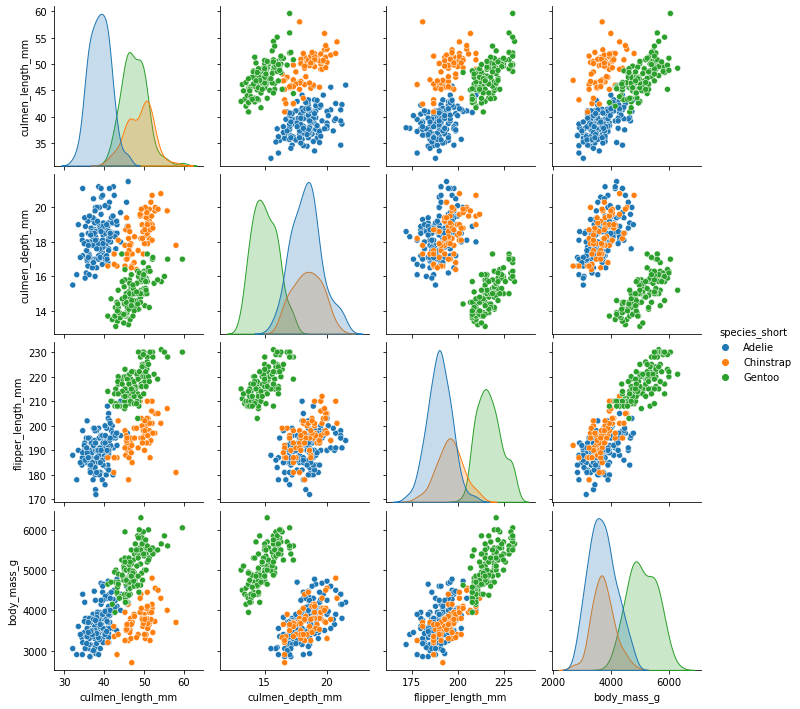

In [100]:
sns.pairplot(penguins, hue='species_short')

[0.68641678 0.19448404]
0.8809008255695708


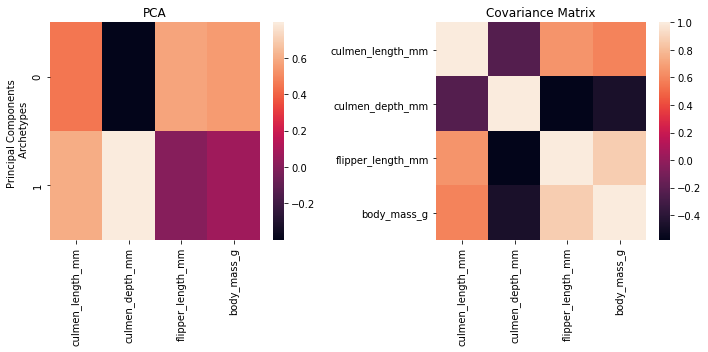

In [101]:

def fit_pca(features,standardize = True,n_components = 2):
    if standardize:
        features = (features-features.mean())/features.std()
    decomposer = PCA(n_components=n_components)
    decomposer.fit(features)
    print(decomposer.explained_variance_ratio_)
    print(decomposer.explained_variance_ratio_.sum())
    transformed_data = decomposer.transform(features)
    return decomposer,features, transformed_data

def plot_pca_heatmap(decomposer, features):
    fig,axes = plt.subplots(1,2,figsize = (10,5))
    sns.heatmap(decomposer.components_,ax = axes[0])
    axes[0].set_title("PCA")
    axes[0].set_ylabel("Principal Components \n Archetypes")
    axes[0].set_xticklabels(features.columns,rotation=90)
    sns.heatmap(features.cov(),ax = axes[1])
    axes[1].set_title("Covariance Matrix")

    plt.tight_layout()
decomposer,features_standardized, transformed_data_standardized = fit_pca(penguins[numerical_columns])
plot_pca_heatmap(decomposer, features_standardized)

In [102]:
decomposer.components_

array([[ 0.45330241, -0.39953853,  0.57678201,  0.54973485],
       [ 0.60201807,  0.79485063,  0.00512057,  0.07589797]])

[9.99893266e-01 7.81736226e-05]
0.9999714399013825


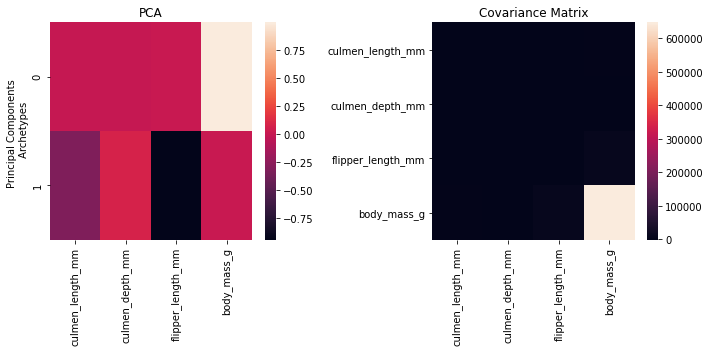

In [103]:
decomposer,features, transformed_data = fit_pca(penguins[numerical_columns],standardize=False)
plot_pca_heatmap(decomposer, features)

In [104]:
# az első 2 főkomponens terében ábrázolva az adat, ahol a szín a class
components = pd.DataFrame(transformed_data_standardized,columns = ["comp_1","comp_2"])
components["LABEL"] = penguins["species_short"].values
components

,comp_1,comp_2,LABEL
0,-1.855704,0.031629,Adelie
1,-1.318743,-0.442808,Adelie
2,-1.379618,-0.160845,Adelie
3,-1.888064,-0.014534,Adelie
4,-1.922954,0.814957,Adelie
...,...,...,...
329,1.991827,-0.972027,Gentoo
330,1.826711,-0.780491,Gentoo
331,2.743995,0.269303,Gentoo
332,1.708037,-0.723026,Gentoo


<AxesSubplot:xlabel='comp_1', ylabel='comp_2'>

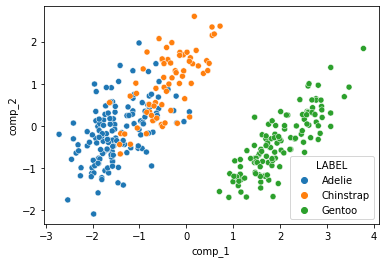

In [105]:
import seaborn as sns
sns.scatterplot(x = "comp_1",y = "comp_2", data = components,hue = "LABEL")

In [109]:
components.corr()

,comp_1,comp_2
comp_1,1.000000e+00,1.332241e-16
comp_2,1.332241e-16,1.000000e+00


<AxesSubplot:xlabel='comp_1', ylabel='comp_2'>

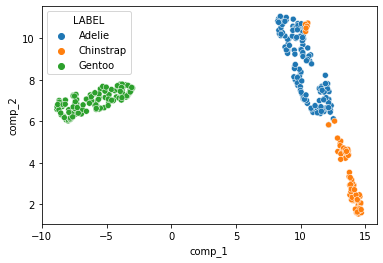

In [108]:
# lássuk mi van ha nemlineárisan csináljuk
import umap
reducer = umap.UMAP()
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
embedding = pd.DataFrame(reducer.fit_transform(scaled_penguin_data),columns = ["comp_1","comp_2"])
embedding["LABEL"] = penguins["species_short"].values
sns.scatterplot(x = "comp_1",y = "comp_2", data = embedding,hue = "LABEL")

In [107]:
# hallelujah
# itt am könnyebben szét lehet választani h mi van
